In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image

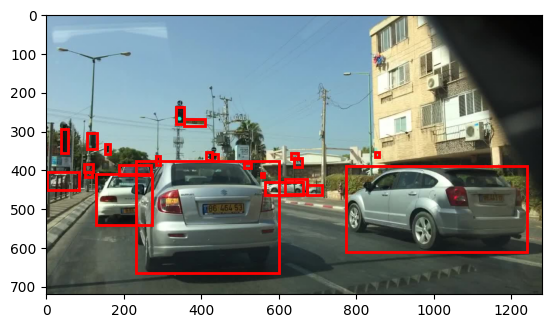

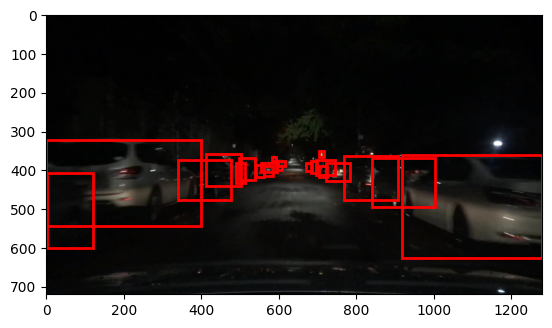

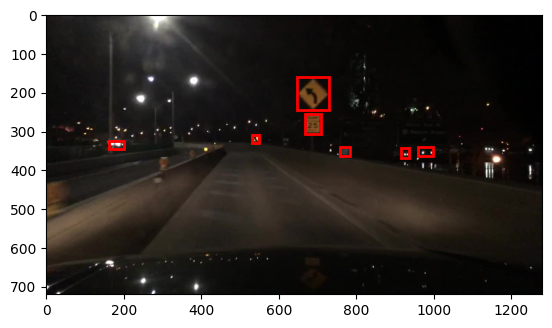

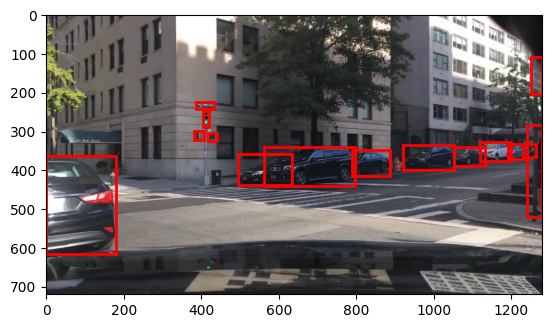

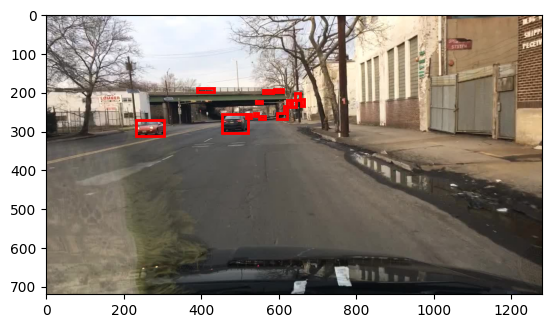

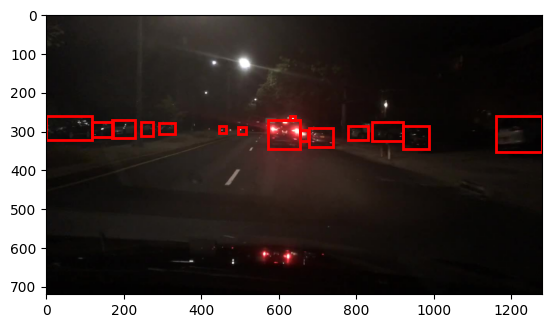

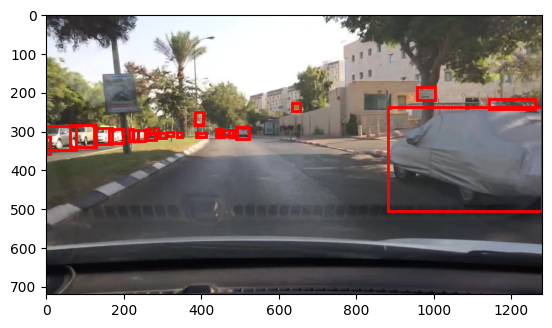

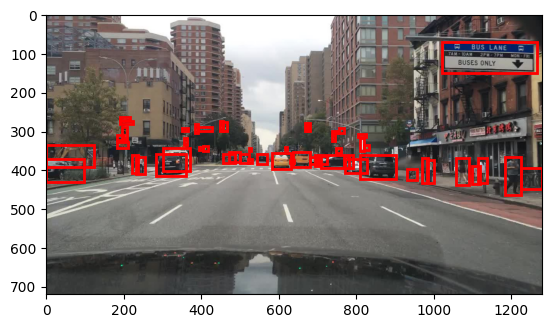

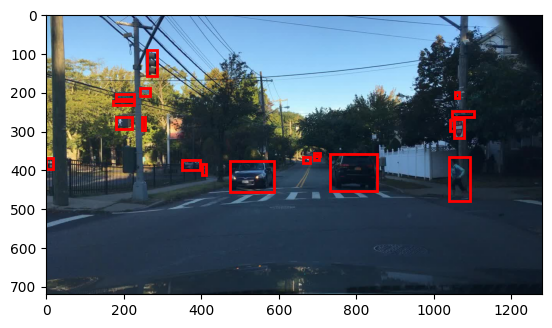

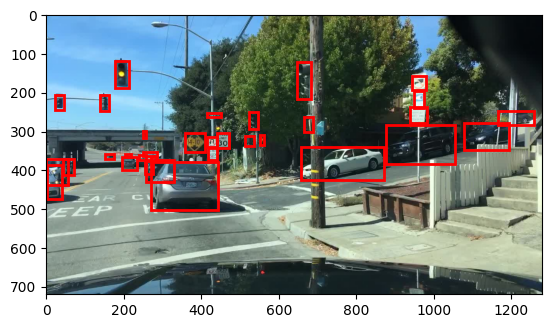

In [9]:
import json
import os

FOLDER = "/home/leo.andeol/datasets/bdd100k/100k/val/"

# Find a list of 10 images in the folder
image_files = [f for f in os.listdir(FOLDER) if f.endswith('.jpg')][:10]

for image_file in image_files:
    image_path = os.path.join(FOLDER, image_file)
    annotation_path = image_path.replace('.jpg', '.json')

    # Load the image
    image = Image.open(image_path)

    # Load the annotation
    with open(annotation_path, 'r') as f:
        annotation = json.load(f)

    # Extract bounding boxes from the annotation
    bounding_boxes = []
    for frame in annotation['frames']:
        for obj in frame['objects']:
            if 'box2d' in obj:
                bounding_boxes.append(obj['box2d'])

    # Display the image with bounding boxes
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Add bounding boxes to the image
    for box in bounding_boxes:
        rect = plt.Rectangle((box['x1'], box['y1']), box['x2'] - box['x1'], box['y2'] - box['y1'], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()


In [10]:
# !wget https://dl.cv.ethz.ch/bdd100k/det/models/cascade_rcnn_convnext-s_fpn_fp16_3x_det_bdd100k.pth

In [11]:
from  torchvision.datasets import VOCDetection

In [12]:
ds = VOCDetection(root="./voc/", year="2012", image_set="val", download=True)

Using downloaded and verified file: ./voc/VOCtrainval_11-May-2012.tar
Extracting ./voc/VOCtrainval_11-May-2012.tar to ./voc/


In [ ]:
ds.

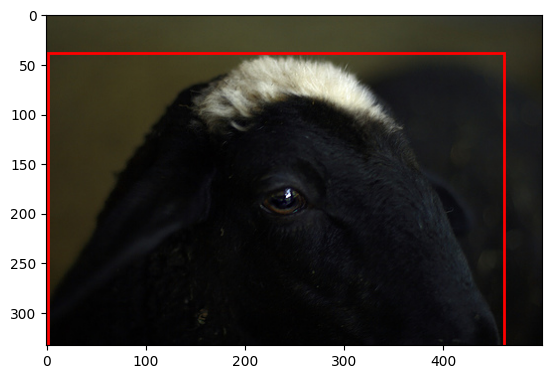

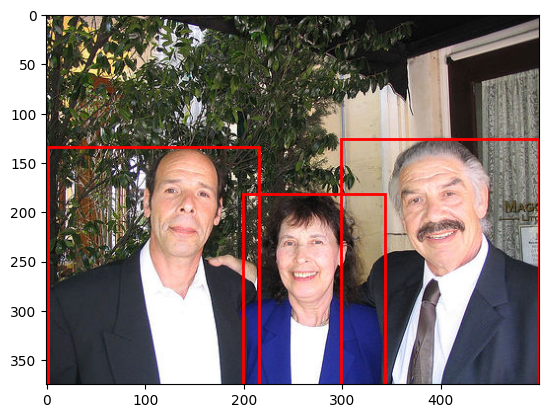

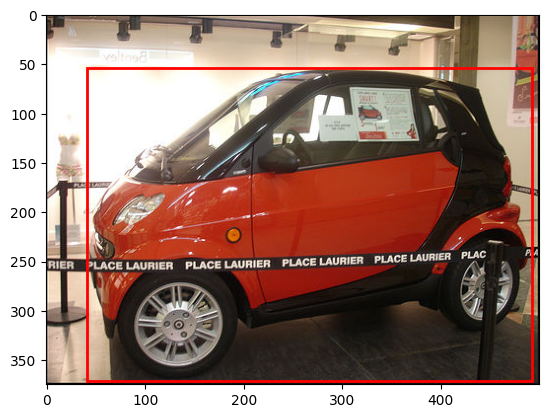

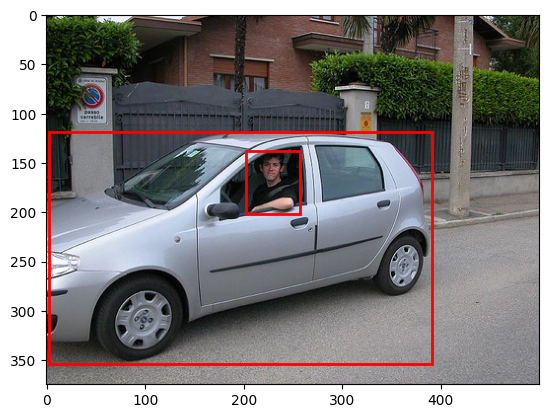

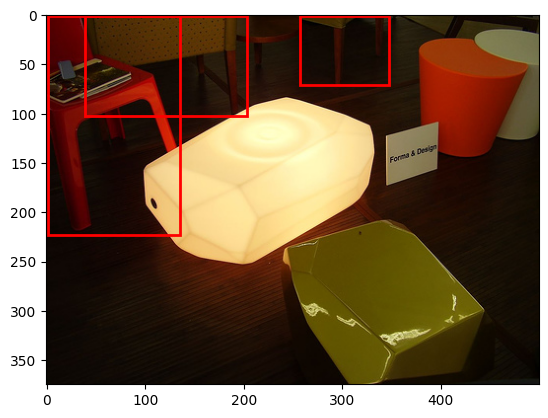

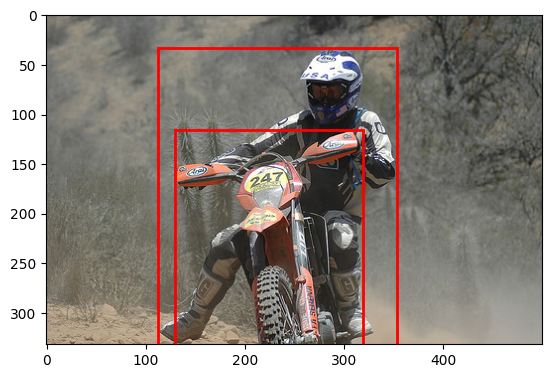

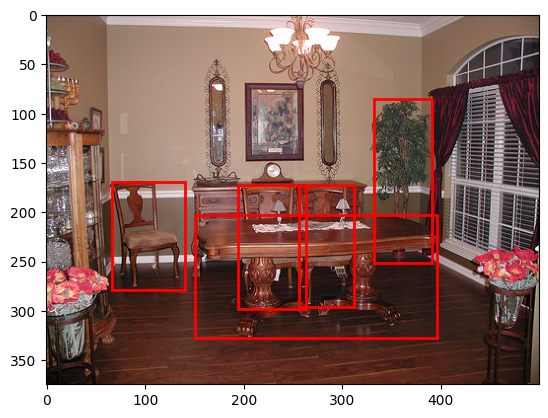

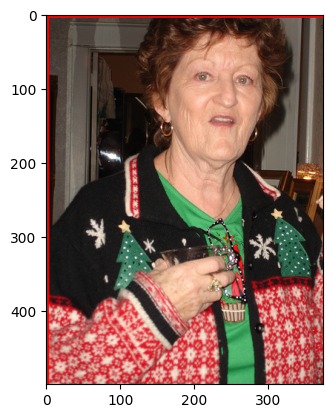

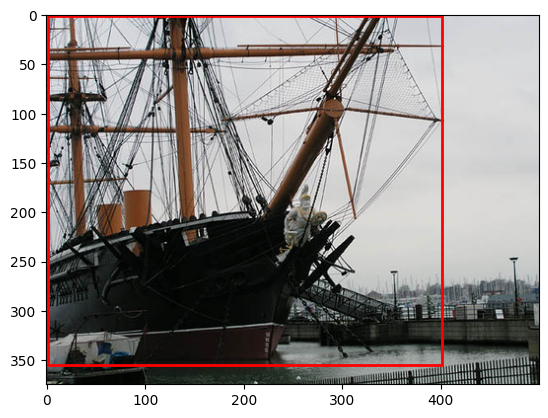

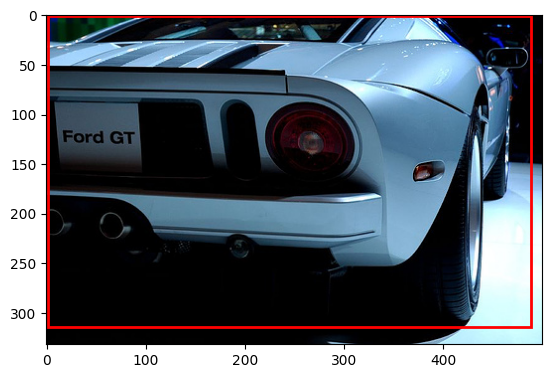

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Select a random image and its annotation from the dataset
indexs = np.random.randint(0, len(ds) - 1, 10)
for index in indexs:
    image, annotation = ds[index]


    # Extract bounding boxes from the annotation
    bounding_boxes = []
    for obj in annotation['annotation']['object']:
        if 'bndbox' in obj:
            box = obj['bndbox']
            bounding_boxes.append({
                'x1': int(box['xmin']),
                'y1': int(box['ymin']),
                'x2': int(box['xmax']),
                'y2': int(box['ymax'])
            })

    # Display the image with bounding boxes
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Add bounding boxes to the image
    for box in bounding_boxes:
        rect = plt.Rectangle((box['x1'], box['y1']), box['x2'] - box['x1'], box['y2'] - box['y1'], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    plt.show()